In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cardio_train.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Features:

Age | Objective Feature | age | int (days)<br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

In [4]:
df.shape

(70000, 13)

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Preprocessing

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
5        21914
6        22113
7        22584
8        17668
9        19834
10       22530
11       18815
12       14791
13       19809
14       14532
15       16782
16       21296
17       16747
18       17482
19       21755
20       19778
21       21413
22       23046
23       23376
24       16608
25       14453
26       19559
27       18085
28       14574
29       21057
         ...  
69970    22572
69971    20136
69972    17065
69973    22142
69974    18226
69975    21264
69976    21699
69977    16843
69978    18800
69979    22423
69980    17727
69981    17500
69982    18941
69983    19652
69984    17926
69985    18194
69986    18198
69987    18852
69988    21978
69989    21013
69990    15094
69991    20609
69992    18792
69993    19699
69994    21074
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [8]:
df['age'] = (df['age'] / 365).round()

In [9]:
df['gender'].unique()

array([2, 1], dtype=int64)

In [10]:
df1 = df

In [11]:
df1['gender'].replace(1, 'Female',inplace=True)
df1['gender'].replace(2, 'Male',inplace=True)

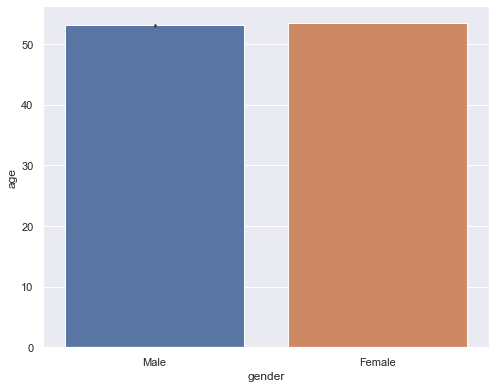

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6.27)})
sns.barplot(x='gender', y='age', data=df1)

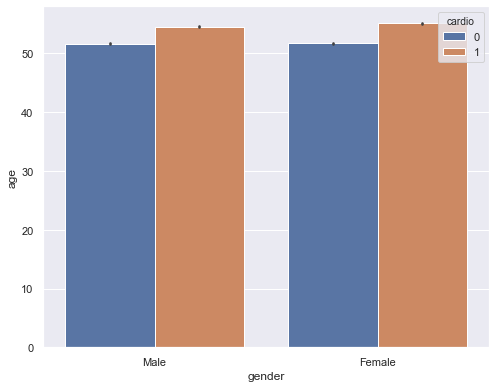

In [13]:
sns.barplot(x='gender', y='age', hue ='cardio', data=df1)

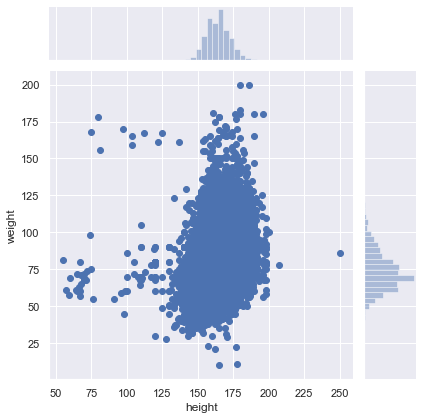

In [14]:
sns.jointplot(x='height', y='weight', data=df)

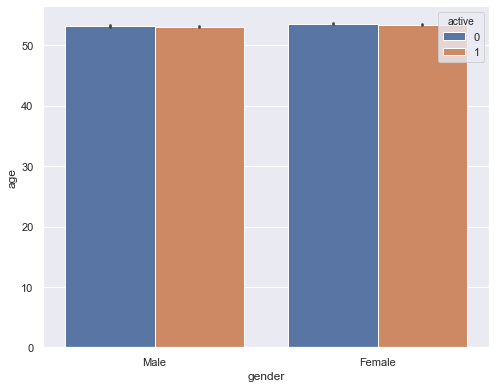

In [15]:
sns.barplot(x='gender', y='age', hue ='active', data=df1)

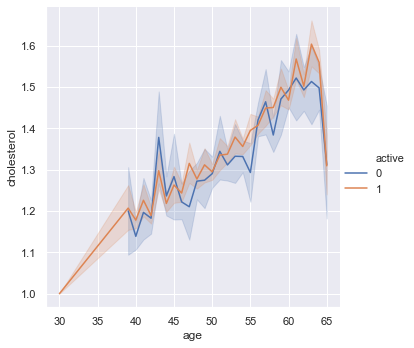

In [16]:
sns.relplot(x="age", y="cholesterol", hue="active", kind="line", data=df1);

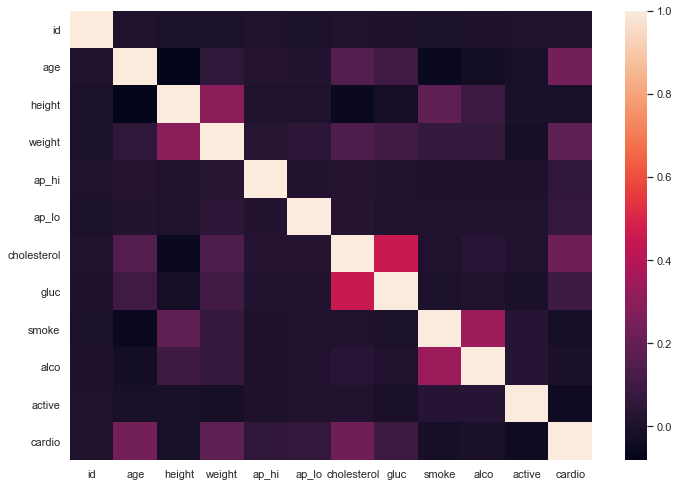

In [17]:
x= df1.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(x)

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
df1['gender']=le.fit_transform(df1['gender'])

In [20]:
X=df1.iloc[:,1:12]
y=df1['cardio']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

In [32]:
lg=LogisticRegression()

In [33]:
lg.fit(X_train, y_train)

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [34]:
lg.score(X_test, y_test)

0.7094285714285714

In [35]:
score = lg.score(X_test, y_test)

In [36]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
decision_tree.score(X_test, y_test)

0.6312857142857143

In [38]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [39]:
svc.score(X_test, y_test)

0.719

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\linear_model\_logistic.py

LR: 0.707529 (0.005410)
KNN: 0.688871 (0.003159)


C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.635300 (0.005150)


C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.590457 (0.005157)


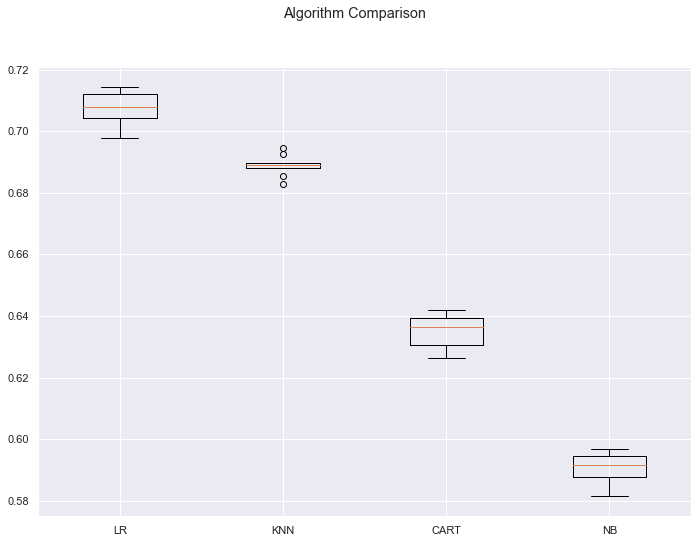

In [46]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()